<h2>Desafio 4 - Trabajo Final</h2>

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3>Limpieza y exploración de datos



<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Exploración](#section_exploration)




<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [2]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')

In [3]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [4]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [5]:
df.shape

(412, 19)

In [6]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

312

In [7]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                 0
vehiculo_modelo                0
vehiculo_tipo                  0
vehiculo_traccion              0
vehiculo_id_motor              0
vehiculo_cilindrada            1
vehiculo_potencia            287
vehiculo_tipo_transmision      0
vehiculo_tipo_combustible      0
vehiculo_standard_emision      3
lca_numero                   119
fecha_firma                    8
ensayo_gei_numero              0
ensayo_gei_laboratorio         0
emision_CO2                    0
consumo_urbano                 2
consumo_extraurbano            2
consumo_mixto                  0
id_etiqueta                    0
dtype: int64

In [8]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [9]:
df.shape

(412, 12)

In [10]:
df.isna().any(axis=1).sum()

6

In [11]:
df.dropna(inplace=True)

In [12]:
df.reset_index(inplace = True, drop =True)

In [13]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [14]:
df.shape

(406, 12)

In [15]:
df.isna().sum()

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

<a id="section_exploration"></a> 
<h3> Exploración </h3>

[volver a TOC](#section_toc)

In [16]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [17]:
df['vehiculo_marca'].value_counts()

MERCEDES-BENZ        31
HYUNDAI              31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
FIAT                 17
RENAULT              17
MINI                 16
HONDA                15
VOLKSWAGEN           15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LIFAN                 8
LEXUS                 8
SUZUKI                7
JEEP                  7
LAND ROVER            6
PEUGEOT / CITROËN     6
FAW                   5
BAIC                  4
MASERATI              4
ZOTYE                 4
BORGWARD              4
JAC                   4
ALFA ROMEO            4
DOMY                  4
KIA                   3
HAVAL                 3
PORSCHE               3
DS                    3
MITSUBISHI            3
CHERY                 2
ZANELLA               2
MERCEDES-AMG          2
FOTON                 2
ISUZU                 2
SUBARU                2
CITROËN / DS    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

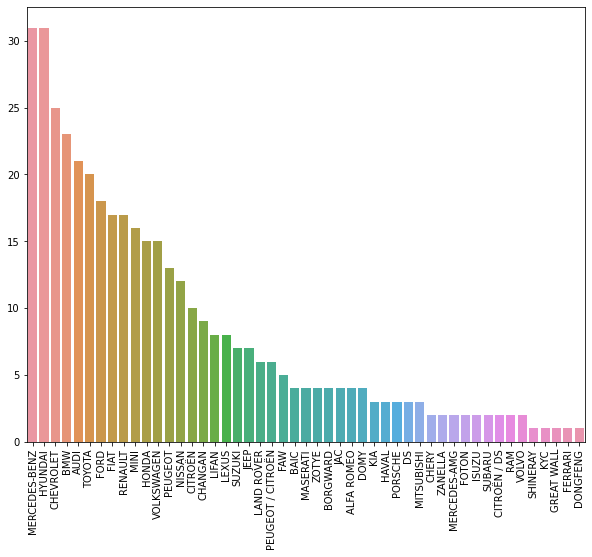

In [18]:
mkI = df['vehiculo_marca'].value_counts().index
mkV = df['vehiculo_marca'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkI,mkV)
plt.xticks(rotation='vertical')

In [19]:
df['vehiculo_marca'].unique()

array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
       'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
       'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
       'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
       'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
       'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
       'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
       'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC',
       'FERRARI'], dtype=object)

In [ ]:
# df_Make=df['vehiculo_marca'].value_counts().reset_index().rename(columns={'index':'vehiculo_marca','vehiculo_marca':'Count'})[0:25]
# df_Make
# fig = go.Figure(go.Bar(x=df_Make['vehiculo_marca'],y=df_Make['Count'],
#         marker={'color': df_Make['Count'], 'colorscale': 'Viridis'}, 
#         text=df_Make['Count'],
#         textposition = "outside",
# ))
# fig.update_layout(title_text='Top 25 Company',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
# fig.show()

In [21]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                                            39
SEDÁN 5 PUERTAS                                            38
RURAL                                                      29
SUV                                                        28
BERLINA                                                    21
                                                           ..
CAMIONETA DE 4 PUERTAS                                      1
MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)     1
TODO TERRENO                                                1
BERLINA 4 PUERTAS Y PORTÓN TRASERO                          1
MONOVOLUMEN 5 PLAZAS / MONOVULUMEN 7 PLAZAS                 1
Name: vehiculo_tipo, Length: 98, dtype: int64

In [22]:
tipo_df = pd.read_csv('Data/tipo_vehiculos.csv')

In [23]:
tipo_df_dic = tipo_df.set_index('ID').T.to_dict('list')

In [24]:
df.vehiculo_tipo = df.vehiculo_tipo.replace(tipo_df_dic)


In [25]:
df['vehiculo_tipo'].value_counts()

4 Puertas                                                                  102
5 Puertas                                                                   85
Rural                                                                       53
Coupe                                                                       50
PICK UP                                                                     45
SUV                                                                         44
Furgon                                                                       6
Camion                                                                       5
BUS                                                                          4
SUV  CROSSOVER 4 PUERTAS CON PORTÓN TRASERO                                 3
4x4                                                                          3
PICK UP CABINA SIMPLE DOBLE                                                  1
BERLINA 4 PUERTAS Y PORTÓN TRASERO                  

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

/Users/Nakin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

/Users/Nakin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



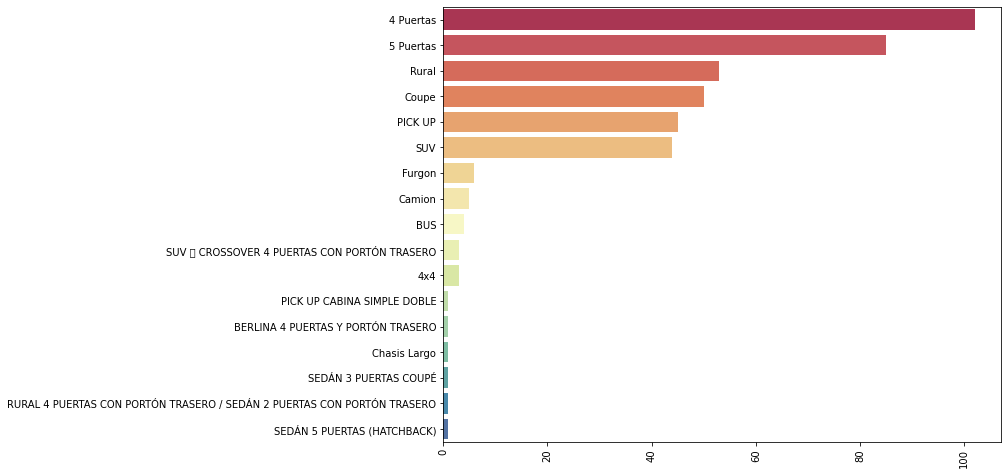

In [26]:
mkI = df['vehiculo_tipo'].value_counts().index
mkV = df['vehiculo_tipo'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkV,mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

In [27]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [28]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
CTT                                              1
E-CVT (Hibrida controlada electrónicamente)      1
MANUAL AUTOMATIZADA                              1
Name: vehiculo_tipo_transmision, dtype: int64

In [29]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  61
NAFTA / ELECTRICIDAD     25
DIESEL                    4
Name: vehiculo_tipo_combustible, dtype: int64

In [30]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI d       5
EURO VI a       5
EURUO V         1
EURO  VI b      1
Name: vehiculo_standard_emision, dtype: int64

In [31]:
df.columns


Index(['vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehiculo_cilindrada,406.0,2084.467980,796.148300,997.00,1587.0000,1984.0,2298.0000,6496.00
emision_CO2,406.0,180.538473,42.006972,88.00,150.2950,175.7,204.0000,360.00
consumo_urbano,406.0,10.045764,4.911663,2.39,8.0575,9.4,11.1225,92.00
consumo_extraurbano,406.0,6.379975,1.378159,3.50,5.4625,6.1,7.0075,12.95
consumo_mixto,406.0,9.277389,33.017760,3.80,6.4775,7.4,8.4150,672.00


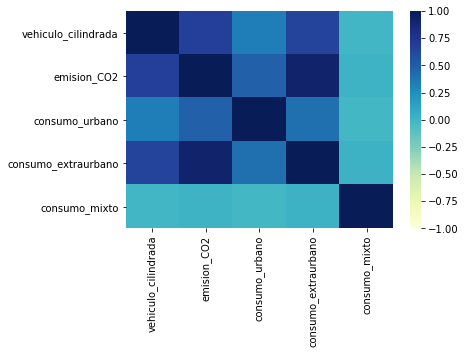

In [33]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

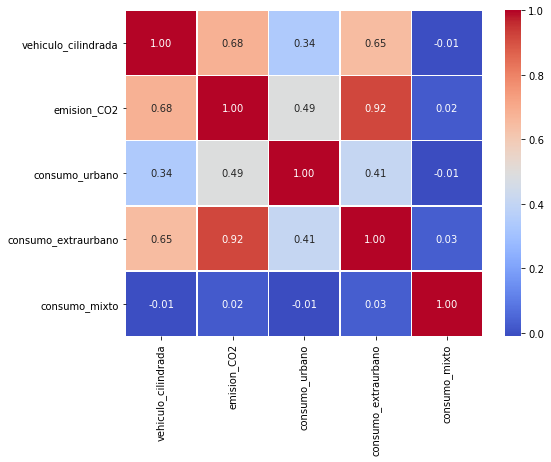

In [38]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

/Users/Nakin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

/Users/Nakin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



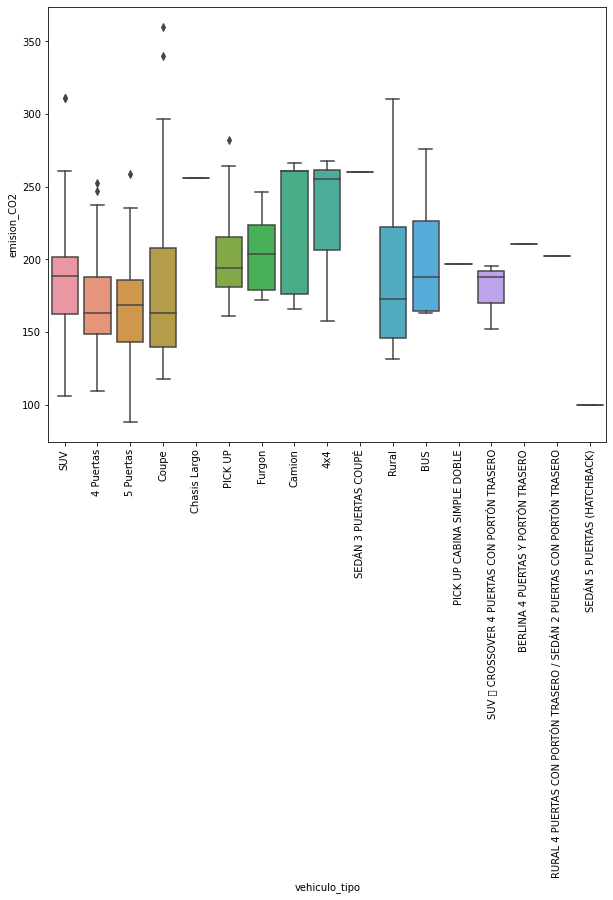

In [34]:
#El boxplot muestra que los camiones y 4x4 emiten mas CO2 comparado a otros tipos de vehiculoss

plt.figure(figsize = (10,8))
sns.boxplot(x="vehiculo_tipo", y="emision_CO2", data=df)
plt.xticks(rotation = 'vertical')


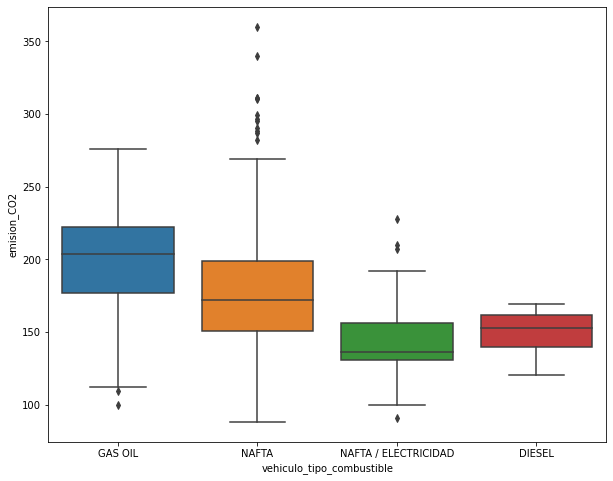

In [35]:
#El boxplot muestra que los vehiculos que usan GAS OIL emiten mas CO2
plt.figure(figsize = (10,8))
sns.boxplot(x = 'vehiculo_tipo_combustible' , y = 'emision_CO2', data = df)
plt.show()

In [36]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [37]:
df.to_csv(path_or_buf='Data/co2_emissions_clean.csv', sep=',',
                   header=True, encoding='utf8', index=False)